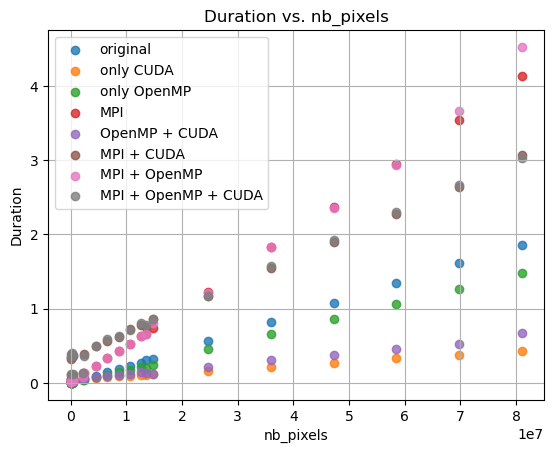

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_file(filename, label):
    data = pd.read_csv("results/"+filename, header=None, names=["N", "size", "n_images", "width", "height", "use_mpi", "use_omp", "use_cuda", "duration"])
    data["nb_pixels"] = data["width"] * data["height"] * data["n_images"]
    grouped_data = data.groupby("nb_pixels").mean().reset_index()
    plt.scatter(grouped_data["nb_pixels"].values, grouped_data["duration"].values, label=label, alpha=0.8)


plot_file("runs_0_0_0.log", "original")
plot_file("runs_0_0_1.log", "only CUDA")
plot_file("runs_0_1_0.log", "only OpenMP")
plot_file("runs_1_0_0.log", "MPI")
plot_file("runs_0_1_1.log", "OpenMP + CUDA")
plot_file("runs_1_0_1.log", "MPI + CUDA")
plot_file("runs_1_1_0.log", "MPI + OpenMP")
plot_file("runs_1_1_1.log", "MPI + OpenMP + CUDA")
# Add labels and legend
plt.xlabel("nb_pixels")
plt.ylabel("Duration")
plt.title("Duration vs. nb_pixels")
plt.legend()
plt.grid(True)

plt.show()